# Plot of survey number density vs cosmic volume

Cosmic volume is typically calculated using https://cosmocalc.icrar.org/ (click on 'Survey Design' tab), with the Planck18 cosmology.

The basic philosophy is to adopt the maximum redshift at which each survey is 'assumed' to probe large-scale structure, and evaluate the number density at that redshift.

In [1]:
import numpy as np
from astropy.io import fits 
from astropy.table import Table

import matplotlib
matplotlib.rc('mathtext',fontset='stixsans')
import matplotlib.pyplot as plt
%matplotlib inline

t= Table(names=('Survey', 'redshift','number_den', 'volume'), dtype=('U15','f4','f8','f8'))


### PFS Tomography survey

$n = 2.4 \times 10^{-3} (\mathrm{Mpc}/h)^{-3}$ equivalent galaxy number density to reproduce cosmic web recovery, and volume of $ V = 2.7 \times 10^7 (\mathrm{Mpc}/h)^3$. The latter is the cosmic volume over $2.2<z<2.7$ within 12.3 sq deg.

In [2]:
t.add_row(('PFS IGM', 2.5, 2.4e-3, 2.7e7))

### PFS Low-z survey
Reading off left panel of Fig 6 in public document, we get $n < 10^{-3.1}\mathrm{Mpc}^{-3}$ at $0.7<z<1.6$. (Using the solid line... the dotted line is for $J<23$?)

This calculation probably uses more than 12.3 sq deg, but we will proceed to use this as the area for the cosmic volume calculation: $0.104\mathrm{Gpc}^3$ or $3.57 \times 10^7\,(\mathrm{Mpc}/h)^3$

In [3]:
n_pfslowz = 10**(-3.1)/0.7**3
vol_pfslowz = 0.104e9 * 0.7**3

t.add_row(('PFS Low-z', 2., n_pfslowz, vol_pfslowz))

### DEEP2 

We use numbers reported by Newman et al 2013 (http://adsabs.harvard.edu/abs/2013ApJS..208....5N).

Fig 7 in that paper gives comoving number density as a function of redshift: $n > 3.3 \times 10^{-3} (\mathrm{Mpc}/h)^{-3}$ for $z< 1.2$

The total observed area is given in Table 3: 2.78 sq deg. Over $0<z<1.2$, this yields $V=5.5\times 10^6 (\mathrm{Mpc}/h)^3$

In [4]:
numberden_deep2 = 3.3e-3
vol_deep2 = 5.5e6
t.add_row(('DEEP2', 1.2, numberden_deep2, vol_deep2))

### SDSS
For the SDSS main galaxy survey, we read off Fig 7 of Newman et al 2013.

We pick $z=0.15$ as the maximum redshift, at which the number density is $n = 3 \times 10^{-3} (\mathrm{Mpc}/h)^{-3}$. The volume is evaluated assuming 10,000 sq deg

In [5]:
numden_sdss = 3.e-3
vol_sdss = 0.259*1e9*0.7**3
t.add_row(('SDSS', 0.15, numden_sdss, vol_sdss))

### VIPERS
Again, read off left panel of Fig 6 in public document: over $0.4<z <0.9$, the number density is $n < 10^{-3.16}\mathrm{Mpc}^{-3}$.

Total footprint is 23.5 sq deg, which yields $V = 0.063\,\mathrm{Gpc}^3$ over the aforementioned redshift range. 

In [6]:
numberden_vipers = 10**(-3.16)/0.7**3
vol_vipers = 0.063e9 *0.7**3
t.add_row(('VIPERS',0.9, numberden_vipers, vol_vipers))

### GAMA

The number density here is estimated off the mock survey estimated in Lee+2021 (https://ui.adsabs.harvard.edu/abs/2021arXiv210900386L); see Fig 3. This is explicitly designed to match GAMA so should be sensible. 

This yields $n = 2.5 \times 10^{-3}\,(\mathrm{Mpc}/h)^{-3}$ at $z\leq 0.3$ over a volume of $0.053\,\mathrm{Gpc}^3$.

In [7]:
numberden_gama = 2.5e-3
vol_gama = 0.053e9 * 0.7**3
t.add_row(('GAMA', 0.3, numberden_gama, vol_gama))

### zCOSMOS-Deep

The footprint of zCOSMOS-Deep is RA = [150.65, 149.6]deg and Dec = [1.72, 2.63] i.e. 0.96 sq deg.

Fig 1 in Ata+2021 gives the number density of galaxies in zCOSMOS-Deep per $\Delta z =0.16$ bin. From personal experience, zCOSMOS is a good probe of large-scale structure out to $z=2.5$ so we adopt the number density there and find the lower-end of the redshift range at which this is maintained.


In [8]:
numz_26 = 200/(0.00197e9*0.7**3)
numz_24 = 350/(0.00197e9*0.7**3) # from ICRAC cosmology calculator. 
numz_19 = 280/(0.00191e9*0.7**3)
numz_17 = 220/(0.00186e9*0.7**3)

print(numz_17, numz_19, numz_24, numz_26)

numberden_zcos = numz_19
vol_zcos = 0.00852e9 * 0.7**3
t.add_row(('zCOSMOS-Deep', 2.5, numberden_zcos, vol_zcos))

0.0003448383961879683 0.00042739608932578274 0.0005179736869367037 0.0002959849639638307


### Hectomap

DR1 paper (Sohn et al 2021, https://ui.adsabs.harvard.edu/abs/2021ApJ...909..129S) provides data over deg<sup>2</sup> out of the eventual 54 deg<sup>2</sup> footprint.

We assume that it traces the cosmic web out to z=0.6, and evaluate the number density accordingly. Fig 7 gives the DR1 redshift distribution in $\Delta z = 0.1$ bins, and by eye we estimate N=80 in the $z=0.60$ bin. 

In [9]:
numden_hec = 80/(0.000421*1e9*0.7**3)
vol_hec = 0.0630 * 1e9* 0.7**3
t.add_row(('HectoMap', 0.6, numden_hec, vol_hec))

### MOONS
Numbers from MOONRISE given by Alan Pearl

In [10]:
t.add_row(('MOONS Low-z', 0.85, 95960./8373738.919, 8373738.919))
# t.add_row(('MOONS Mid-z', 1.5, 144518./12309378.83, 12309378.83))
t.add_row(('MOONS Hi-z', 1.35, 186242./28185675.09, 28185675.09 ))

In [14]:
print(186242./28185675.09)

0.006607682782310821


### Generate plot

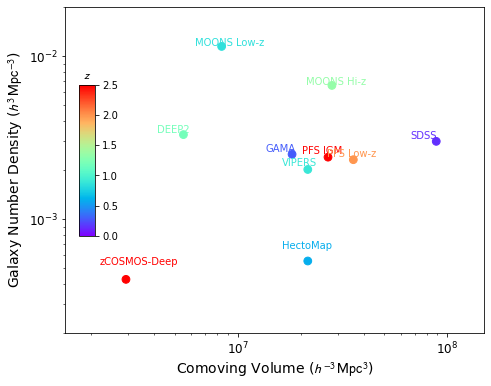

In [18]:
fig, ax = plt.subplots(figsize=(7.5,6))

colormap = 'rainbow'

den = t['number_den']
vol = t['volume']
red = t['redshift']

cmap = matplotlib.cm.get_cmap(colormap)
rgba = cmap(red/2.5)

s=ax.scatter(vol, den, c=rgba,s=60)

for dat in t:
    rgba_tmp = cmap(dat['redshift']/2.5)
    ax.annotate(dat['Survey'], (dat['volume']*0.75, dat['number_den']+1e-4),c=rgba_tmp)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(2e-4, 2e-2)
ax.set_xlim(0.15e7, 1.5e8)
# ax.ticklabel_format(axis='y', scilimits=[-1, 1],style='sci')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# ax.yaxis.major.formatter._useMathText = True

ax.set_xlabel(r'Comoving Volume ($h^{-3}\,\mathrm{Mpc}^3$)',fontsize=14)
ax.set_ylabel(r'Galaxy Number Density ($ h^3\,\mathrm{Mpc}^{-3}$)',fontsize=14)


cax = fig.add_axes([0.15,0.35,0.03,0.35])
cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0., vmax=2.5),cmap=colormap),
             cax=cax, orientation='vertical')
cbar.ax.set_title(r'$z$')

plt.show()